# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [35]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('/Users/allisoncannady/Documents/WHO_Data_Word.xlsx')
df.head()

,Country,Total Population Male,Total Population Female,Total Population Both,Life Expectancy Male,Life Expectancy Female,Life Expectancy Both,Healthy Life Expectancy Male,Healthy Life Expectancy Female,Healthy Life Expectancy Both,...,Hand Washing,Water Treated,Dev Expend Mil,Clean Fuel Tech,Pollution Urban,Homicide Mortality,Polio Cases,Hypertension 30-79,Obesity 5-19,Obesity Adults
0,Afghanistan,19976,18952,38928,63.3,63.2,63.2,54.7,53.2,53.9,...,38,-,140.29,33,63.6,8.5,1,40.2,3.1,5.5
1,Albania,1465,1413,2878,76.3,79.9,78,68,70.3,69.1,...,-,13,48.53,81,19.3,3.6,0,41.8,7.6,21.7
2,Algeria,22154,21697,43851,76.2,78.1,77.1,66.7,66.1,66.4,...,85,76,3.01,100,34.1,1.7,0,36.2,13.5,27.4
3,Andorra,-,-,77,-,-,-,-,-,-,...,-,100,-,100,9.5,-,-,31,12.8,25.6
4,Angola,16261,16605,32866,60.7,65.5,63.1,53.6,56.2,54.8,...,27,-,4.61,50,40.3,9.2,0,38.7,2.4,8.2


In [36]:
df.tail()

,Country,Total Population Male,Total Population Female,Total Population Both,Life Expectancy Male,Life Expectancy Female,Life Expectancy Both,Healthy Life Expectancy Male,Healthy Life Expectancy Female,Healthy Life Expectancy Both,...,Hand Washing,Water Treated,Dev Expend Mil,Clean Fuel Tech,Pollution Urban,Homicide Mortality,Polio Cases,Hypertension 30-79,Obesity 5-19,Obesity Adults
189,Venezuela (Bolivarian Republic of),13985,14451,28436,69.9,78.2,73.9,61.9,67.1,64.4,...,-,-,1.02,97,20.1,63.6,0,39.4,14.1,25.6
190,Viet Nam,48598,48740,97339,69.6,78.1,73.7,62.4,68.3,65.3,...,86,-,428.07,65,23.8,1.9,0,29.7,2.6,2.1
191,Yemen,15025,14801,29826,64.4,68.9,66.6,56.9,58.2,57.5,...,-,34,51.97,62,40.3,9.7,0,29.3,7,17.1
192,Zambia,9103,9281,18384,59.5,65.4,62.5,52.5,56.3,54.4,...,18,-,68.86,10,29.4,6.5,0,32.3,2.9,8.1
193,Zimbabwe,7092,7771,14863,57.5,63.6,60.7,51.2,54.8,53.1,...,42,23,18.05,30,24.6,13.1,0,42.3,4,15.5


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

In [37]:
missing_values=['-']
df=df.replace(missing_values,np.NaN)
df.head()

,Country,Total Population Male,Total Population Female,Total Population Both,Life Expectancy Male,Life Expectancy Female,Life Expectancy Both,Healthy Life Expectancy Male,Healthy Life Expectancy Female,Healthy Life Expectancy Both,...,Hand Washing,Water Treated,Dev Expend Mil,Clean Fuel Tech,Pollution Urban,Homicide Mortality,Polio Cases,Hypertension 30-79,Obesity 5-19,Obesity Adults
0,Afghanistan,19976.0,18952.0,38928,63.3,63.2,63.2,54.7,53.2,53.9,...,38.0,NaN,140.29,33,63.6,8.5,1.0,40.2,3.1,5.5
1,Albania,1465.0,1413.0,2878,76.3,79.9,78.0,68.0,70.3,69.1,...,NaN,13,48.53,81,19.3,3.6,0.0,41.8,7.6,21.7
2,Algeria,22154.0,21697.0,43851,76.2,78.1,77.1,66.7,66.1,66.4,...,85.0,76,3.01,100,34.1,1.7,0.0,36.2,13.5,27.4
3,Andorra,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100,NaN,100,9.5,NaN,NaN,31.0,12.8,25.6
4,Angola,16261.0,16605.0,32866,60.7,65.5,63.1,53.6,56.2,54.8,...,27.0,NaN,4.61,50,40.3,9.2,0.0,38.7,2.4,8.2


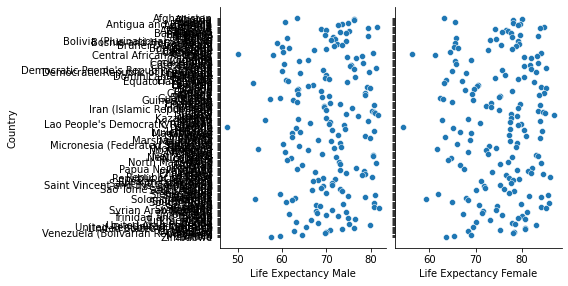

In [61]:
sns.pairplot(df, x_vars=['Life Expectancy Male', 'Life Expectancy Female'], 
             y_vars='Country', size=4, aspect=1, kind='scatter')
plt.show()

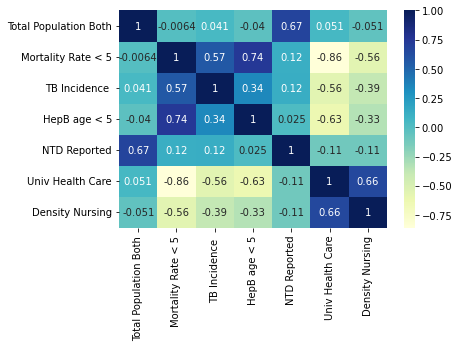

In [5]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [39]:
#creating specific columns for regression that I can delete NaN values and do analysis with
df2 = df[['Life Expectancy Male', 'Life Expectancy Female']].copy()
df2.head()

,Life Expectancy Male,Life Expectancy Female
0,63.3,63.2
1,76.3,79.9
2,76.2,78.1
3,NaN,NaN
4,60.7,65.5


In [40]:
#deleting NaN values
df2.shape

(194, 2)

In [41]:
df3 = df2.dropna()

In [42]:
df3.shape

(183, 2)

In [43]:
#double checking datatypes
df3.dtypes

Life Expectancy Male      float64
Life Expectancy Female    float64
dtype: object

In [44]:
df3.head()

,Life Expectancy Male,Life Expectancy Female
0,63.3,63.2
1,76.3,79.9
2,76.2,78.1
4,60.7,65.5
5,74.9,78.0


In [45]:
#create model
X = df3['Life Expectancy Male']
y = df3['Life Expectancy Female']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Life Expectancy Female   R-squared:                       0.899
Model:                                OLS   Adj. R-squared:                  0.899
Method:                     Least Squares   F-statistic:                     1126.
Date:                    Sat, 04 Mar 2023   Prob (F-statistic):           1.14e-64
Time:                            05:58:01   Log-Likelihood:                -279.19
No. Observations:                     128   AIC:                             562.4
Df Residuals:                         126   BIC:                             568.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5414      1.986      4.301      0.000       4.611      12.471
Life Expectancy Male     0.9487      0.028     33.550      0.000       0.893       1.005
==============================================================================
Omnibus:                        0.015   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.053
Skew:                           0.022   Prob(JB):                        0.974
Kurtosis:                       2.910   Cond. No.                         731.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
df3.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

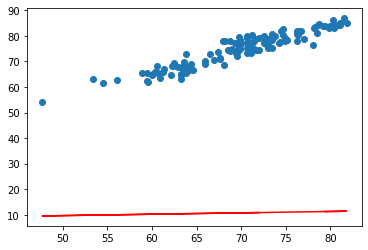

In [49]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [50]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

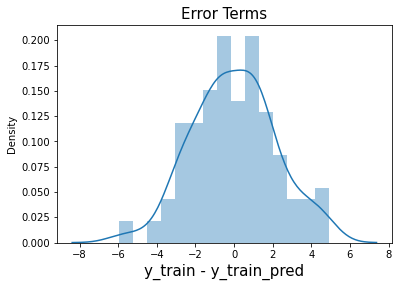

In [52]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [53]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
y_test_pred

12     79.694802
171    79.125575
16     83.774264
76     77.892249
48     84.058878
62     84.248620
184    70.587166
162    66.223090
33     63.566696
180    68.499999
117    71.061522
105    67.551287
80     80.358901
177    81.022999
144    72.010234
160    59.771847
67     68.974355
104    83.110166
8      85.671689
43     80.074287
93     71.346135
77     85.197333
150    73.812787
95     78.746090
100    85.007590
85     79.125575
1      80.928128
158    83.110166
123    76.943537
148    74.192272
156    85.387075
88     74.951241
190    74.571757
27     66.887188
163    85.102461
102    67.646158
173    66.887188
42     80.169158
125    66.602575
91     83.774264
72     62.997468
30     65.748734
68     83.110166
122    84.817848
84     85.292204
172    72.958946
157    79.505060
193    63.092340
167    85.197333
21     79.125575
32     56.166741
29     72.294847
152    71.915363
46     74.287143
120    73.907658
dtype: float64

In [60]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
print("R^2= ", r_squared)

R^2=  0.9652859768045576


## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 
--> My R squared value was 0.965 which is a very high level of correlation. 

2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 
--> yes, I believe for my data a linear regression was the best type of statistical model to use based on my results.

3. Was your plot of the error terms a bell curve? 
--> Yes! My plot of the error terms was a bell curve.
